In [1]:
%pylab inline
from astropy import units
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from profiles import *

In [11]:
G = constants.G
H = 67.8 * units.km / units.s / units.Mpc
print G

   Name   = Gravitational constant
  Value  = 6.67384e-11
  Error  = 8e-15
  Units  = m3 / (kg s2)
  Reference = CODATA 2010


In [20]:
vc_NFW?
Rvir = 261 * units.kpc
Mvir = 1E12 * units.Msun

In [21]:
vc = vc_NFW(261/26.47, 261, 0, 0, 1E12)

In [24]:
vc1 = np.sqrt( ( G * Mvir )/ Rvir)

print vc, vc1.to(units.km / units.s)

 128.353442223 km / s 128.386889681 km / s


In [30]:
f = 360 * 0.27
print f

97.2


In [35]:
M = vc**3 / (np.sqrt(48.6) * G * H)

In [36]:
print M.to(units.Msun)

1.03990309166e+12 solMass


In [42]:
R = vc / (np.sqrt(48.6) * H)

In [43]:
R.to(units.kpc)

<Quantity 271.556180573134 kpc>

In [65]:
v_chervin = 162.9 * units.km / units.s

In [241]:
M = v_chervin**3 / (10 * G * H)
M =  M.to(units.Msun)
print M

1.48201191852e+12 solMass


In [242]:
R = v_chervin / (10*H)
print R.to(units.kpc)

240.265486726 kpc


In [243]:
Mvir

<Quantity 1000000000000.0 solMass>

In [244]:
IC = loadtxt('../ICs/MW_models/MW1/rotcurve.txt', skiprows=1)

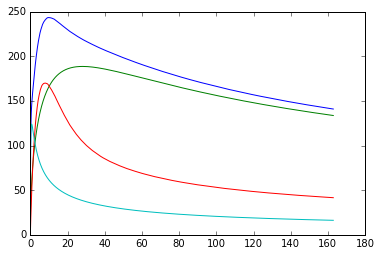

In [245]:
plot(IC[:,0], IC[:,1])
plot(IC[:,0], IC[:,2])
plot(IC[:,0], IC[:,3])
plot(IC[:,0], IC[:,4])

In [246]:
x = linspace(0, 170)

In [271]:
#M = 1.46E12 
Md = M * 0.065
Mb = M * 0.01
Mh = M - Md - Mb
A = 2.00 * 24.2
A_approx = 41.41
vc_halo = vc_hernquist(A_approx, x, 0, 0, Mh.value)
Mnfw = 1E12-(1E12*0.065 + 1E12*0.01)
vc_N = vc_NFW(10, x, 0, 0, Mh.value / 1.46)
#vc_disk = vc_mn?
print M, Mnfw

1.48201191852e+12 solMass 9.25e+11


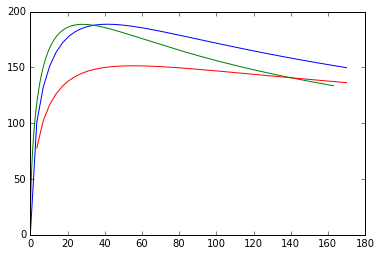

In [272]:
plot(x,  vc_halo)
plot(IC[:,0], IC[:,2])
plot(x, vc_N)

In [250]:
vc_bulge = vc_hernquist(A * 0.025, x, 0, 0, Mb.value)

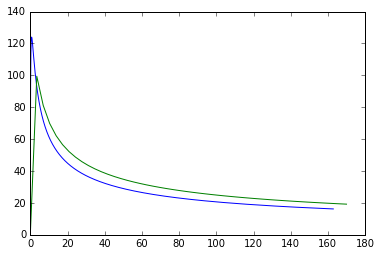

In [251]:
plot(IC[:,0], IC[:,4])
plot(x, vc_bulge)

## LMC1 rotation curves 

In [53]:
#data_n = loadtxt('../data/ICs/LMC/curve1_n.txt', skiprows=1)
data_n = loadtxt('rotcurve.txt', skiprows=1)

In [48]:
x = linspace(0, 60, 100)
vc_1 = vc_hernquist(8, x, 0, 0, 3E10)
vc_2 = vc_hernquist(11, x, 0, 0, 5E10)
vc_3 = vc_hernquist(14, x, 0, 0, 8E10)
vc_4 = vc_hernquist(15, x, 0, 0, 1E11)
vc_5 = vc_hernquist(20, x, 0, 0, 1.8E11)
vc_6 = vc_hernquist(22.5, x, 0, 0, 2.5E11)

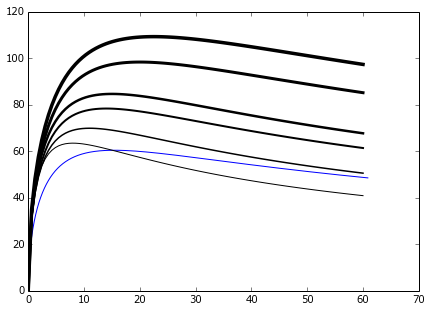

In [54]:
figure(figsize=(7, 5))
#plot(data_c[:,0], data_c[:,1])
plot(data_n[:,0], data_n[:,1])

# ---------------- Theoretical -----------------------
plot(x, vc_1, c='k', lw=1)
plot(x, vc_2, c='k', lw=1.5)
plot(x, vc_3, c='k', lw=2)
plot(x, vc_4, c='k' ,lw=2.5)
plot(x, vc_5, c='k', lw=3)
plot(x, vc_6, c='k', lw=3.5)

In [46]:
vc_hernquist?